In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
%matplotlib inline

## IMPORTING DATA 

In [2]:
data = pd.read_csv('data_retail.csv', sep=';')
data.head()

,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
0,1,1,29531,Jaket,1466304274396,1538718482608,1467681,22
1,2,2,29531,Sepatu,1406077331494,1545735761270,1269337,41
2,3,3,141526,Tas,1493349147000,1548322802000,310915,30
3,4,4,141526,Jaket,1493362372547,1547643603911,722632,27
4,5,5,37545,Sepatu,1429178498531,1542891221530,1775036,25


## DATA CLEANING

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   no                          100000 non-null  int64 
 1   Row_Num                     100000 non-null  int64 
 2   Customer_ID                 100000 non-null  int64 
 3   Product                     100000 non-null  object
 4   First_Transaction           100000 non-null  int64 
 5   Last_Transaction            100000 non-null  int64 
 6   Average_Transaction_Amount  100000 non-null  int64 
 7   Count_Transaction           100000 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 6.1+ MB


In [4]:
data.describe()

,no,Row_Num,Customer_ID,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
count,100000.000000,100000.000000,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000
mean,50000.500000,50000.500000,193083.996940,1.492184e+12,1.509970e+12,1.373157e+06,11.698500
std,28867.657797,28867.657797,200747.292955,3.948432e+10,3.563295e+10,1.544435e+06,35.417324
min,1.000000,1.000000,654.000000,1.362729e+12,1.362729e+12,0.000000e+00,1.000000
25%,25000.750000,25000.750000,60994.500000,1.467106e+12,1.491482e+12,4.783038e+05,1.000000
50%,50000.500000,50000.500000,121441.000000,1.499012e+12,1.518611e+12,9.059370e+05,2.000000
75%,75000.250000,75000.250000,196023.000000,1.523675e+12,1.539695e+12,1.636372e+06,6.000000
max,100000.000000,100000.000000,846213.000000,1.549061e+12,1.549065e+12,4.881014e+07,3852.000000


In [5]:
data.isnull().sum()

no                            0
Row_Num                       0
Customer_ID                   0
Product                       0
First_Transaction             0
Last_Transaction              0
Average_Transaction_Amount    0
Count_Transaction             0
dtype: int64

In [6]:
# Drop column 'no' and 'Row_Num'
data.drop(['no', 'Row_Num'],axis=1, inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Customer_ID                 100000 non-null  int64 
 1   Product                     100000 non-null  object
 2   First_Transaction           100000 non-null  int64 
 3   Last_Transaction            100000 non-null  int64 
 4   Average_Transaction_Amount  100000 non-null  int64 
 5   Count_Transaction           100000 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 4.6+ MB


In [8]:
# change column First_Transaction and Last_Transaction to datetime type
# Column First_Transaction
data['First_Transaction'] = pd.to_datetime(data['First_Transaction']/1000, unit='s', origin='1970-01-01')
# Column Last_Transaction
data['Last_Transaction'] = pd.to_datetime(data['Last_Transaction']/1000, unit='s', origin='1970-01-01')

In [9]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Customer_ID                 100000 non-null  int64         
 1   Product                     100000 non-null  object        
 2   First_Transaction           100000 non-null  datetime64[ns]
 3   Last_Transaction            100000 non-null  datetime64[ns]
 4   Average_Transaction_Amount  100000 non-null  int64         
 5   Count_Transaction           100000 non-null  int64         
dtypes: datetime64[ns](2), int64(3), object(1)
memory usage: 4.6+ MB


### Churn Customer
### To determine churn customers according to the given definition, look for
- When was the most recent transaction made?
- classify which customers are churn statuses and which are not. After that print the top five data and dataset information.

In [10]:
# Checking the last transaction in the dataset
max(data['Last_Transaction'])

# Classify customers who have churn status or not with boolean
data.loc[data['Last_Transaction'] <= '2018-08-01', 'is_churn'] = True
data.loc[data['Last_Transaction'] > '2018-08-01', 'is_churn'] = False

In [11]:
data.head()

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn
0,29531,Jaket,2016-06-19 02:44:34.396000000,2018-10-05 05:48:02.608000000,1467681,22,False
1,29531,Sepatu,2014-07-23 01:02:11.493999872,2018-12-25 11:02:41.269999872,1269337,41,False
2,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,False
3,141526,Jaket,2017-04-28 06:52:52.546999808,2019-01-16 13:00:03.911000064,722632,27,False
4,37545,Sepatu,2015-04-16 10:01:38.530999808,2018-11-22 12:53:41.529999872,1775036,25,False


In [12]:
data['is_churn'].value_counts()

True     66569
False    33431
Name: is_churn, dtype: int64

## Convert is_churn column value to numeric using Label Encoder


In [13]:
# Convert feature/column 'Month'
LE = LabelEncoder()
data['is_churn'] = LE.fit_transform(data['is_churn'])
print(LE.classes_)
print(np.sort(data['is_churn'].unique()))
print('')

[False True]
[0 1]



In [14]:
data['is_churn']

0        0
1        0
2        0
3        0
4        0
        ..
99995    1
99996    1
99997    1
99998    1
99999    0
Name: is_churn, Length: 100000, dtype: int32

## EDA

### Customer acquisition by year

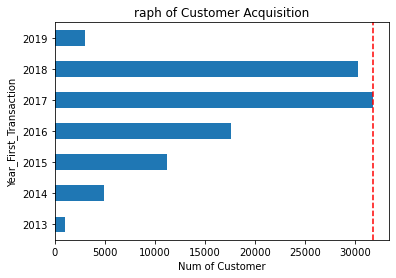

In [15]:
# first transaction column Year
data['Year_First_Transaction'] = data['First_Transaction'].dt.year
# last transaction column year
data['Year_Last_Transaction'] = data['Last_Transaction'].dt.year

data_year = data.groupby(['Year_First_Transaction'])['Customer_ID'].count()
data_year.plot(x='Year_First_Transaction', y='Customer_ID', kind='barh', title='raph of Customer Acquisition')
plt.axvline(31828, color = "r", linestyle = '--')
plt.ylabel('Year_First_Transaction')
plt.xlabel('Num of Customer')
plt.show()

### Transaction by Year

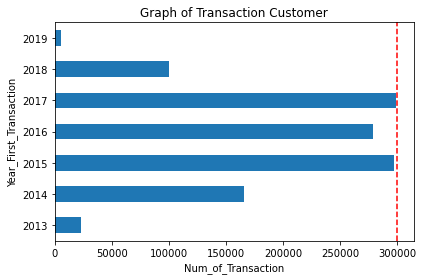

In [16]:
plt.clf()
data_year = data.groupby(['Year_First_Transaction'])['Count_Transaction'].sum()
data_year.plot(x='Year_First_Transaction', y='Count_Transaction', kind='barh', title='Graph of Transaction Customer')
plt.axvline(300000, color = "r", linestyle = '--')
plt.ylabel('Year_First_Transaction')
plt.xlabel('Num_of_Transaction')
plt.tight_layout()
plt.show()

### Average transaction amount by year

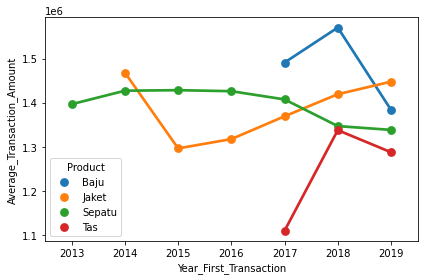

In [17]:
plt.clf()
sns.pointplot(data = data.groupby(['Product', 'Year_First_Transaction']).mean().reset_index(), 
              x='Year_First_Transaction', 
              y='Average_Transaction_Amount', 
              hue='Product')
plt.tight_layout()
plt.show()

### The proportion of churned customers for each product

<Figure size 432x288 with 0 Axes>

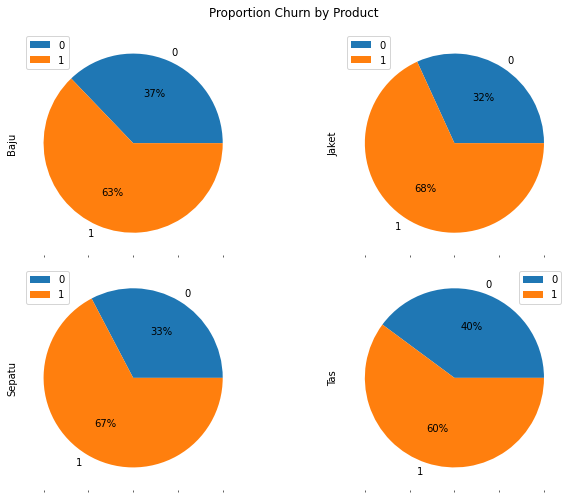

In [18]:
plt.clf()

# pivot data
data_piv = data.pivot_table(index='is_churn', columns='Product', 
                            values='Customer_ID', aggfunc='count', fill_value=0)
# Get Proportion Churn by Product
plot_prod = data_piv.count().sort_values(ascending=False).head().index

# Pie Chart
data_piv = data_piv.reindex(columns=plot_prod)
data_piv.plot.pie(subplots=True, figsize = (10,7), layout = (-1,2), 
                  autopct = '%1.0f%%', title='Proportion Churn by Product')
plt.tight_layout()
plt.show()


### Distribution of categorization of count transactions

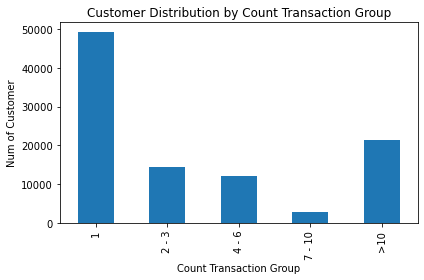

In [19]:
plt.clf()
# Categorization of transaction amount
def func(row):
    if row['Count_Transaction'] == 1:
        val = '1'
    elif (row['Count_Transaction'] > 1 and row['Count_Transaction'] <= 3):
        val = '2 - 3'
    elif (row['Count_Transaction'] > 3 and row['Count_Transaction'] <= 6):
        val = '4 - 6'
    elif (row['Count_Transaction'] > 6 and row['Count_Transaction'] <= 10):
        val = '7 - 10'
    else:
        val = '>10'
    return val

# Add New Column
data['Count_Transaction_Group'] = data.apply(func, axis=1)

data_year = data.groupby(['Count_Transaction_Group'])['Customer_ID'].count()
data_year.plot(x='Count_Transaction_Group', y='Customer_ID', kind='bar', 
               title='Customer Distribution by Count Transaction Group')
plt.xlabel('Count Transaction Group')
plt.ylabel('Num of Customer')
plt.tight_layout()
plt.show()

### Distribution of categorization of average transaction amount

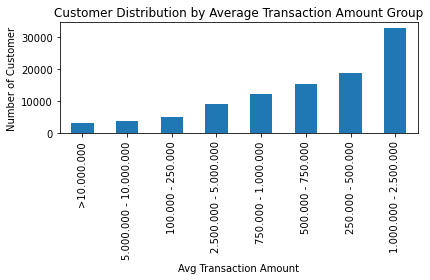

In [20]:
plt.clf()
# Categorization of the average transaction size
def f(row):
    if (row['Average_Transaction_Amount'] >= 100000 and row['Average_Transaction_Amount'] <= 200000):
        val = '100.000 - 250.000'
    elif (row['Average_Transaction_Amount'] > 250000 and row['Average_Transaction_Amount'] <= 500000):
        val = '250.000 - 500.000'
    elif (row['Average_Transaction_Amount'] > 500000 and row['Average_Transaction_Amount'] <= 750000):
        val = '500.000 - 750.000'
    elif (row['Average_Transaction_Amount'] > 750000 and row['Average_Transaction_Amount'] <= 1000000):
        val = '750.000 - 1.000.000'
    elif (row['Average_Transaction_Amount'] > 1000000 and row['Average_Transaction_Amount'] <= 2500000):
        val = '1.000.000 - 2.500.000'
    elif (row['Average_Transaction_Amount'] > 2500000 and row['Average_Transaction_Amount'] <= 5000000):
        val = '2.500.000 - 5.000.000'
    elif (row['Average_Transaction_Amount'] > 5000000 and row['Average_Transaction_Amount'] <= 10000000):
        val = '5.000.000 - 10.000.000'
    else:
        val = '>10.000.000'
    return val

# Add new column
data['Avg_Transaction_Amount_Group'] = data.apply(f, axis=1)

data_year = data.groupby('Avg_Transaction_Amount_Group')['Customer_ID'].count().sort_values()
data_year.plot(x='Avg_Transaction_Amount_Group', y='Customer_ID', 
               kind='bar', title='Customer Distribution by Average Transaction Amount Group')
plt.xlabel('Avg Transaction Amount')
plt.ylabel('Number of Customer')
plt.tight_layout()
plt.show()

### Modelling

### Feature Columns dan Target

In [21]:
# Create column Year Diff
data['Year_Diff'] = data['Year_Last_Transaction'] - data['Year_First_Transaction']

# Names of feature column
feature_col = ['Average_Transaction_Amount', 'Count_Transaction', 'Year_Diff']

# Feature Variable
X = data[feature_col]

# Targer Variable
y = data['is_churn']

### Split X and y into training and testing sections

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### Train, Predict dan Evaluate

In [23]:
# Logreg model initiation
logreg = LogisticRegression()

# Fit the model with data
logreg.fit(X_train, y_train)

# Predict model
y_pred = logreg.predict(X_test)

# Model evaluation using confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[    1,  8330],
       [    3, 16666]], dtype=int64)

### Confusion Matrix Visualization

<Figure size 432x288 with 0 Axes>

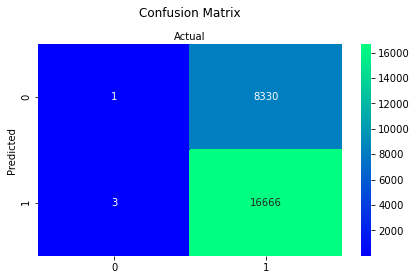

In [24]:
plt.clf()

# name of classes
class_name = [0, 1]
fig, ax = plt.subplots()

tick_marks = np.arange(len(class_name))
plt.xticks(tick_marks, class_name)
plt.yticks(tick_marks, class_name)

# Create Heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='winter', fmt='g')
ax.xaxis.set_label_position('top')
plt.title('Confusion Matrix', y=1.1)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.tight_layout()
plt.show()

### Accuracy, Precision, dan Recall

In [25]:
print('Accuracy :', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='micro'))
print('Recall   :', recall_score(y_test, y_pred, average='micro'))

Accuracy : 0.66668
Precision: 0.66668
Recall   : 0.66668
